In [ ]:
"""
Preprocessing Synthetic Data

Input -> Instance Mask
Output -> Numpy Array (c,h,w)
    c : channel for each object
    h,w : boolean if object is present at that pixel
    
NOTE: the instance map colors are currently random. There may be, by chance, 2 objects with very similar colors
"""

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
rgb_dir = '/home/colt/tobak/rgb/'
mask_dir = '/home/colt/tobak/mask/'

In [26]:
def readcv2(path_to_file):
    x = cv2.imread(path_to_file)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    return x

def remove_tag(image):
    image[750:,700:,:] = 0
    return image

def count_pixels(colors,flat_image):
    """
    count the number of times a given RGB appears in a flattened image.
    """
    find_masks = dict()
    for color in colors:
        #print(color)
        color_count = 0
        for pixel in flat_image:
            if sum(pixel == color) == 3: # this checks if the pixel value is equal to color in loop
                color_count += 1
        print(str(color) + ' pixel count -> ' + str(color_count))
        find_masks[str(color)] = color_count
    return(find_masks)
# unique [r g b] -> COUNT of pixels with rgb in an image

In [4]:
img_rgb = readcv2(rgb_dir + os.listdir(rgb_dir)[0])
img_mask = readcv2(mask_dir + os.listdir(rgb_dir)[0])

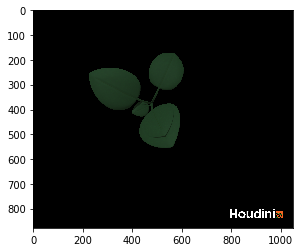

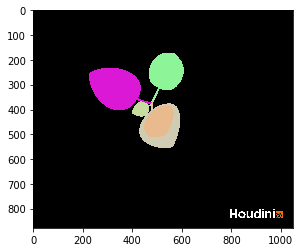

In [5]:
plt.imshow(img_rgb)
plt.show()
plt.imshow(img_mask)
plt.show()

In [6]:
print(os.listdir(mask_dir)[:5])
print(os.listdir(rgb_dir)[:5])

['tobak.2.exr.png', 'tobak.12.exr.png', 'tobak.36.exr.png', 'tobak.17.exr.png', 'tobak.25.exr.png']
['tobak.2.exr.png', 'tobak.12.exr.png', 'tobak.36.exr.png', 'tobak.17.exr.png', 'tobak.25.exr.png']


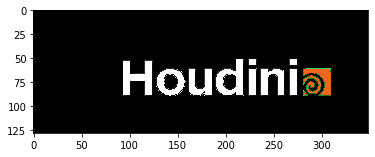

In [7]:
plt.imshow(img_mask[750:,700:,:])

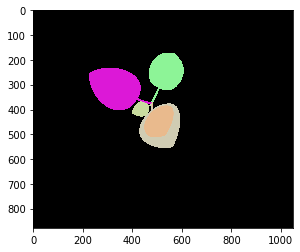

In [10]:
img_mask = remove_tag(img_mask)
plt.imshow(img_mask)

In [21]:
"""
get unique RGB values in an image
"""
img = img_mask
colors = np.unique(img.reshape(-1, img.shape[2]), axis=0)
print(' There are ' + str(len(colors)) + ' unique RGB values')
print(' There are ' + str(img.shape[0] * img.shape[1]) + ' pixels')
print(' There are 5 objects -> by eye ; ideally there would only be 6 unique RGB values')
print(' One for each class and black')

 There are 174 unique RGB values
 There are 921022 pixels
 There are 5 objects -> by eye


In [ ]:
# get unique RGB pixels... then count how many pixels match each

In [22]:
#flatten image so each element is an RGB pixel value
flat_img = img.reshape(-1,img.shape[2])
print(flat_img.shape)
print('total pixels -> ' + str(flat_img.shape[0]))

(921022, 3)
total pixels -> 921022


In [28]:
%time x = count_pixels(colors,flat_img)

[0 0 0] pixel count -> 849317
[141 244 151] pixel count -> 17236
[142 243 152] pixel count -> 1
[142 244 151] pixel count -> 1
[142 244 152] pixel count -> 2
[148 237 156] pixel count -> 1
[151 240 155] pixel count -> 3
[166 232 161] pixel count -> 2
[181 225 150] pixel count -> 1
[184 224 147] pixel count -> 1
[186 178 187] pixel count -> 1
[193 163 192] pixel count -> 1
[194 215 173] pixel count -> 1
[196 214 173] pixel count -> 1
[196 216 146] pixel count -> 1
[198 212 175] pixel count -> 1
[199 212 175] pixel count -> 1
[201 218 160] pixel count -> 1
[201 218 161] pixel count -> 1
[201 219 160] pixel count -> 2
[201 220 159] pixel count -> 3145
[201 220 160] pixel count -> 1
[202 209 177] pixel count -> 1
[202 213 164] pixel count -> 1
[202 214 163] pixel count -> 1
[202 215 162] pixel count -> 1
[202 216 162] pixel count -> 3
[203 169 191] pixel count -> 1
[203 207 167] pixel count -> 1
[203 208 167] pixel count -> 1
[203 210 166] pixel count -> 1
[203 215 166] pixel count -> 1
[2

In [29]:
"""
Attempt to speed things up by randomly sampling 10% of the pixels, finding the unique RGB values.
"""
import random

every_nth = flat_img.shape[0]//10 # get 1/10 of total pixels in image
mini_flat = random.sample(list(flat_img),every_nth)
mini_array = np.array(mini_flat)
mini_colors = np.unique(mini_array,axis=0)

In [30]:
%time y = count_pixels(mini_colors,mini_flat)

[0 0 0] pixel count -> 84813
[141 244 151] pixel count -> 1746
[151 240 155] pixel count -> 1
[201 218 161] pixel count -> 1
[201 220 159] pixel count -> 314
[202 214 163] pixel count -> 1
[206 192 176] pixel count -> 1
[208 183 180] pixel count -> 1
[208 204 179] pixel count -> 1060
[208 204 180] pixel count -> 100
[209 200 181] pixel count -> 1
[209 204 178] pixel count -> 2
[209 204 179] pixel count -> 2
[210 188 186] pixel count -> 1
[210 203 177] pixel count -> 7
[210 203 178] pixel count -> 1
[211 203 176] pixel count -> 1
[212 201 174] pixel count -> 1
[212 202 174] pixel count -> 2
[212 202 175] pixel count -> 1
[214 200 171] pixel count -> 1
[214 201 172] pixel count -> 2
[215 200 170] pixel count -> 3
[217 198 167] pixel count -> 1
[218 198 166] pixel count -> 2
[220  24 215] pixel count -> 2790
[220  25 215] pixel count -> 10
[220  36 215] pixel count -> 1
[220  37 215] pixel count -> 1
[220  42 215] pixel count -> 1
[222 194 159] pixel count -> 1
[222 194 160] pixel count -

In [25]:
# Next... figure out which of these are the object RGBs... 
# Abandon bleeding pixels? or somehow move them to the closest RGB as determined by masks

## K-means clustering

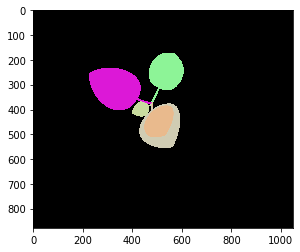

In [31]:
plt.imshow(img_mask)

In [34]:
from sklearn.cluster import KMeans

In [58]:
X = img_mask.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(img.shape)


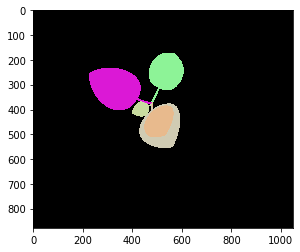

In [60]:
plt.imshow(segmented_img.astype('uint8'))

In [76]:


segmented_imgs = []
n_colors = (1, 2, 3, 4, 5,6,7,8,100)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(img.shape))



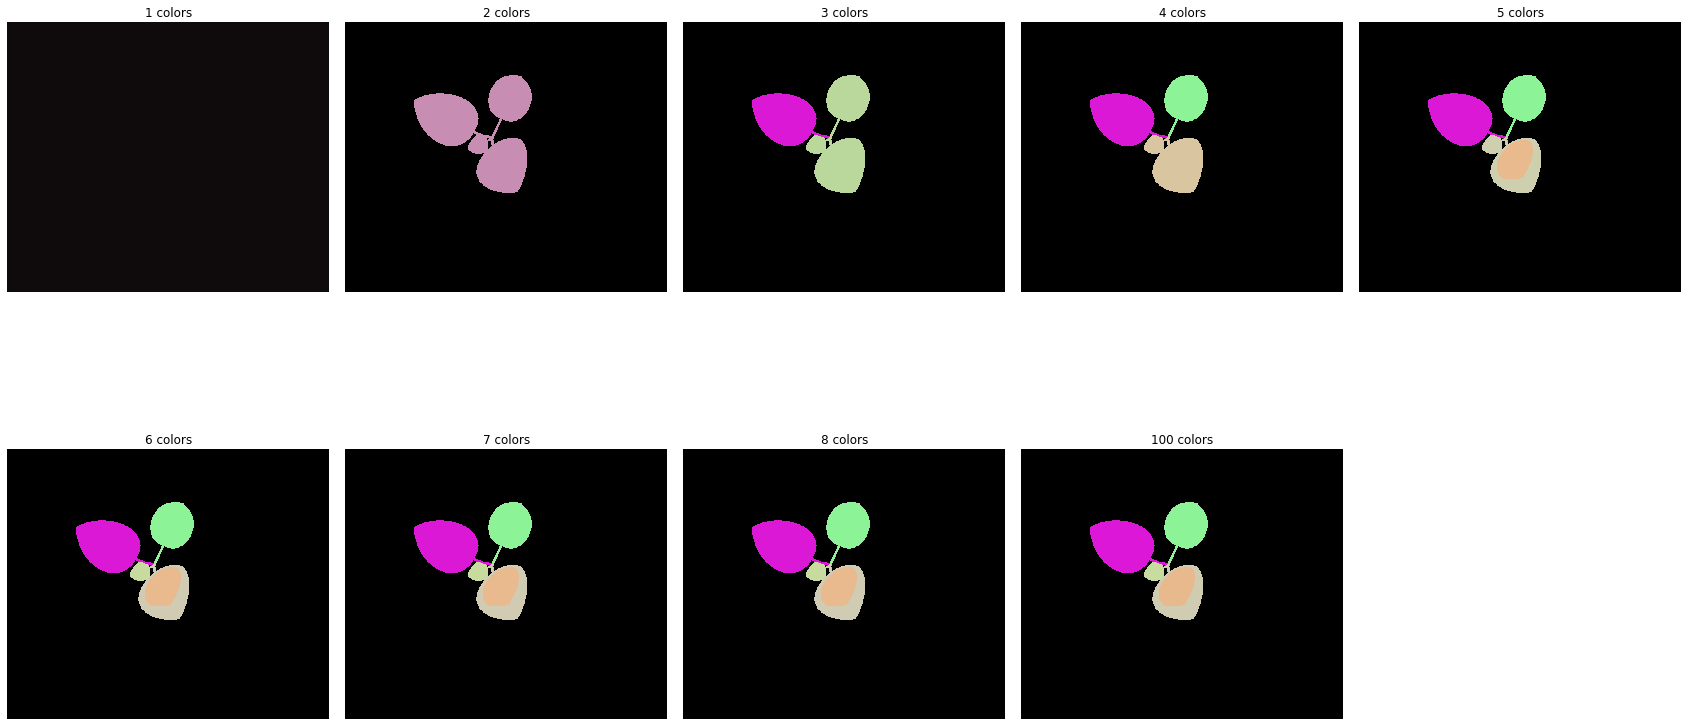

In [80]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(341)
plt.imshow(img)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(251 + idx)
    plt.imshow(segmented_imgs[idx].astype('uint8'))
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

#save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

In [ ]:
#https://www.pyimagesearch.com/2017/08/28/fast-optimized-for-pixel-loops-with-opencv-and-python/

#loop over pixels FAST

#BROKEN